In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D
from mlxtend.classifier import Adaline
from sklearn.model_selection import train_test_split

In [25]:
boston=load_boston()

In [26]:
# x_train,y_train,x_test,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [27]:
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [28]:
boston_df['price']=boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [29]:
boston_df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  price  
0       15.3  396.90   4.98   

In [113]:
x=boston.data[:,[7,12]]

y=boston.target



In [114]:
x=np.array(x)
y=np.array(y)

In [116]:
X=x.reshape(506,2)
Y=y.reshape(506,1)

In [117]:
# m = np.matmul(inv(np.matmul(X.T,X)), np.matmul(X.T,Y))
# print(m)

In [125]:
class Adaline:
    def __init__(self):
        pass
    
    def fit(self, X_train, Y_train):
        self.m = np.matmul(inv(np.matmul(X_train.T, X_train)), np.matmul(X_train.T, Y_train))
        
    def predict(self, X_test):
        Y_pred = np.matmul(X_test, self.m)
        return Y_pred
    
    def mean_Absolt_error(self,X_test,Y_test):
        Y_pred = np.matmul(X_test,self.m)
        MAE = np.abs(Y_test-Y_pred).mean()
        return MAE
    
    def mean_Square_error(self,X_test,Y_test):
        Y_pred = np.matmul(X_test,self.m)
        MSE = np.square(np.subtract(Y_test,Y_pred)).mean()
        return MSE

In [126]:
model = Adaline()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25,random_state=4)

model.fit(X_train, Y_train)
y_pred = model.predict(X)
dim = model.m

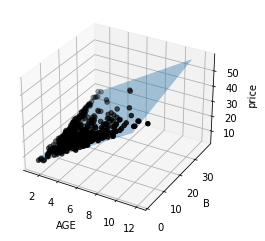

In [127]:
ax = plt.figure().add_subplot(projection='3d')
x_range = np.arange(X[:,0].min(), X[:,0].max())
y_range = np.arange(X[:,1].min(), X[:,1].max())
ax.scatter(X[:,0], X[:,1],y_pred, c='0', marker='o')
x, y = np.meshgrid(x_range, y_range)

z = x * dim[0] + y * dim[1]

ax.plot_surface(x, y,z, rstride=1, cstride=1, alpha = 0.4)

ax.set_xlabel('AGE')
ax.set_ylabel('B')
ax.set_zlabel('price')


plt.show()

In [128]:
class Adaline:
    def __init__(self):
        pass
    
    def fit(self, X_train, Y_train):
        self.m = np.matmul(inv(np.matmul(X_train.T, X_train)), np.matmul(X_train.T, Y_train))
        
    def predict(self, X_test):
        Y_pred = np.matmul(X_test, self.m)
        return Y_pred
    
    def e(self,X_test,Y_test):
        Y_pred = np.matmul(X_test,self.m)
        MSE = np.abs(Y_test-Y_pred).mean()
        return MSE

In [129]:
# x_test=np.array([38])
y_pred=model.predict(X_test)


In [130]:
loss = model.mean_Absolt_error(X_test,Y_test)
print(loss)

8.780523524482717


In [131]:
loss = model.mean_Square_error(X_test,Y_test)
print(loss)

167.14816525006088
